In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns
from sklearn import metrics


In [2]:
import umap

## Reconstruction images

In [24]:
main_dir = '/gpfsscratch/rech/ohv/ueu39kt/outputImg/'
img_file = 'img_7_4280_0.png'

In [25]:
im = cv2.imread(os.path.join(main_dir, img_file))
plt.imshow(im)

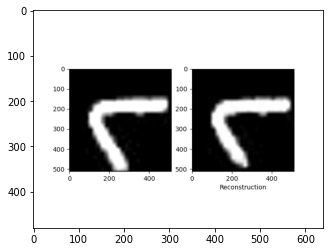

In [4]:
main_dir = '/gpfsscratch/rech/ohv/ueu39kt/MNIST_Norm0/'
loss_file = 'loss_MNIST0.csv'
df_loss = pd.read_csv(main_dir+loss_file, header = None, sep = '\t')

In [5]:
df_loss.head()

,0,1,2
0,0,0.000727,0.058052
1,7,0.002555,0.037833
2,7,0.000573,0.047097
3,7,0.000378,0.034066
4,7,0.004466,0.046610


In [9]:
df_loss.columns  = ['Label', 'MSE', 'SSIM']
df_loss['NormAnorm'] = [0] * df_loss.shape[0]
df_loss['NormAnorm'][df_loss['Label'] == 0] = 1

/gpfslocalsup/pub/anaconda-py3/2020.02/envs/pytorch-gpu-1.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        1
5619     1
5620     1
5621     1
5622     1
        ..
45806    1
45807    1
45808    1
45809    1
45810    1
Name: NormAnorm, Length: 4417, dtype: int64

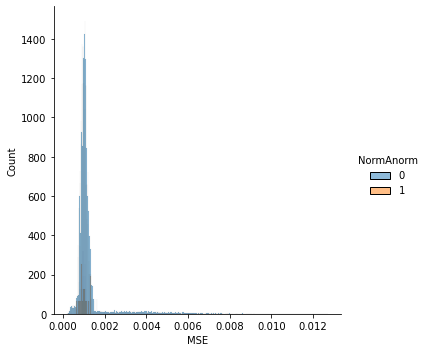

In [13]:
sns.displot(data = df_loss , x='MSE',hue='NormAnorm')

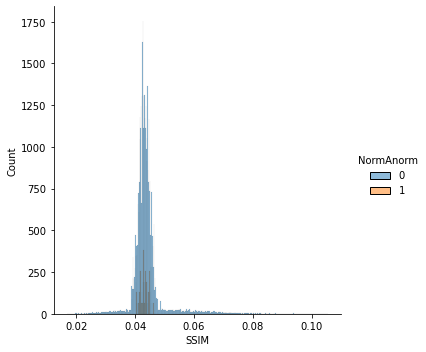

In [14]:
sns.displot(data = df_loss , x='SSIM',hue='NormAnorm')

In [5]:
vector_file = 'vectors_MNIST0.csv'
df_vectors  = pd.read_csv(main_dir+vector_file, header = None, sep = '\t')
df_vectors.head()

,0,1
0,0,[[[ -1.5098706 -14.548368 26.192537 ... 6...
1,9.404616 ],NaN
2,[ 5.7408056 -28.758783 9.042356 ... 25...,NaN
3,-1.1043231],NaN
4,[ 0.5792628 -33.139885 3.1101942 ... 37...,NaN


# Exp1 with MDN Coef 150

In [28]:
main_dir = '/gpfsscratch/rech/ohv/ueu39kt/outputImg/'
img_file = 'img_0_300_0.png'

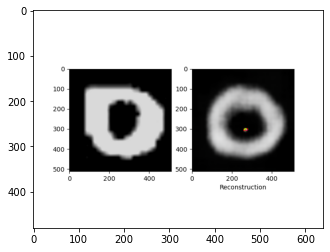

In [29]:
im = cv2.imread(os.path.join(main_dir, img_file))
plt.imshow(im)

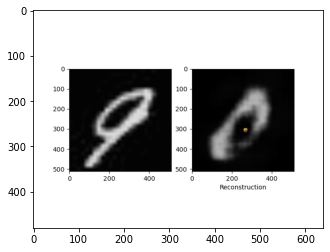

In [10]:
img_file = 'img_9_515_0.png'
im = cv2.imread(os.path.join(main_dir, img_file))
plt.imshow(im)

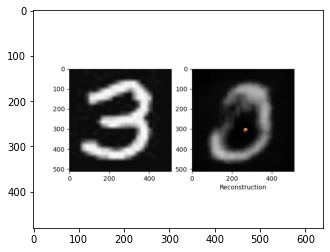

In [31]:
img_file = 'img_3_65_0.png'
im = cv2.imread(os.path.join(main_dir, img_file))
plt.imshow(im)

In [3]:
main_dir = '/gpfsscratch/rech/ohv/ueu39kt/MNIST_Norm0_MDN/'
loss_file = 'loss_MNIST0.csv'
df_loss = pd.read_csv(main_dir+loss_file, header = None, sep = '\t')

In [4]:
df_loss.head()

,0,1,2,3
0,7,0.053738,0.337347,179.961945
1,5,0.027101,0.307013,179.488831
2,0,0.026027,0.250256,180.211853
3,5,0.057551,0.392900,179.830933
4,0,0.019273,0.416530,179.574036


In [5]:
df_loss.columns  = ['Label', 'MSE', 'SSIM', 'MDN']
df_loss['NormAnorm'] = [0] * df_loss.shape[0]
df_loss['NormAnorm'][df_loss['Label'] == 0] = 1

/gpfslocalsup/pub/anaconda-py3/2020.02/envs/pytorch-gpu-1.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df_loss[df_loss['NormAnorm'] == 0 ]

,Label,MSE,SSIM,MDN,NormAnorm
0,7,0.053738,0.337347,179.961945,0
1,5,0.027101,0.307013,179.488831,0
3,5,0.057551,0.392900,179.830933,0
5,5,0.052613,0.411587,179.833008,0
6,4,0.078759,0.383692,180.535492,0
...,...,...,...,...,...
5470,4,0.035189,0.384364,180.025757,0
5471,7,0.037129,0.297255,180.220154,0
5472,8,0.043233,0.502347,180.900574,0
5473,3,0.044918,0.377446,179.684814,0


In [7]:
df_loss[df_loss['NormAnorm'] == 1 ]

,Label,MSE,SSIM,MDN,NormAnorm
2,0,0.026027,0.250256,180.211853,1
4,0,0.019273,0.416530,179.574036,1
11,0,0.017157,0.286950,179.547134,1
14,0,0.017734,0.371515,180.057861,1
24,0,0.027686,0.342855,179.893372,1
...,...,...,...,...,...
5387,0,0.023874,0.402777,179.851135,1
5391,0,0.022298,0.373457,180.040405,1
5393,0,0.018690,0.451596,179.343231,1
5420,0,0.016719,0.375633,180.002075,1


In [11]:
df_loss['MSE_SSIM'] = df_loss['MSE'] + df_loss['SSIM']

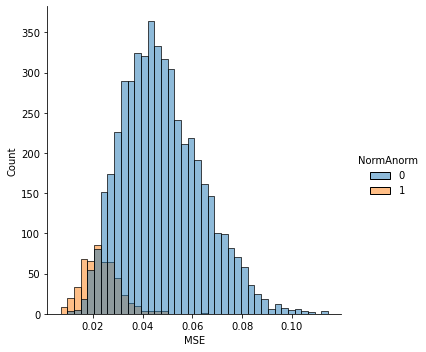

In [8]:
sns.displot(data = df_loss , x='MSE',hue='NormAnorm')

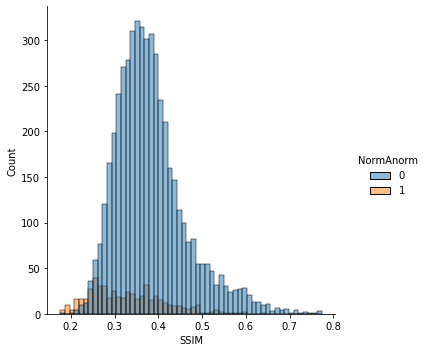

In [9]:
sns.displot(data = df_loss , x='SSIM',hue='NormAnorm')

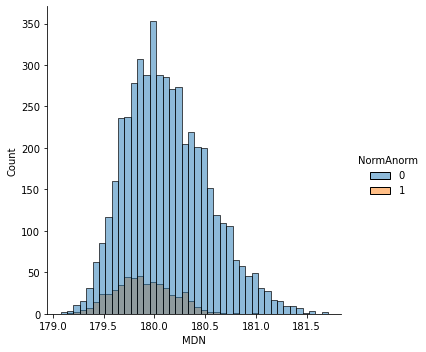

In [10]:
sns.displot(data = df_loss , x='MDN',hue='NormAnorm')

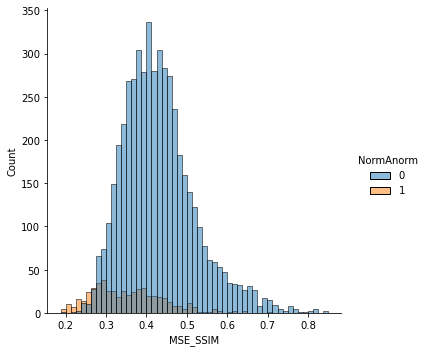

In [12]:
sns.displot(data = df_loss , x='MSE_SSIM',hue='NormAnorm')

In [13]:
def DrawRocCurves(df_FCN, loss='MSE',ascending=False):
    df_FCN = df_FCN.sort_values(by=loss, ascending=ascending)

    #count all classes
    class_count = df_FCN['NormAnorm'].value_counts()
    pos_count = class_count[1]
    neg_count = class_count[0]
    pos_count

    #store results here
    coords = [(0,0)]
    #FPR as horizontal x axis    
    fp=0
    #TPR as vertical y axis
    tp=0

    #for each truthful prediction
    for truth in df_FCN['NormAnorm']:
        if truth == 1:
            tp +=1
        else:
            fp +=1
        #update result
        coords.append((fp, tp))
    #get tally as separate lists
    fp, tp = map(list, zip(*coords))
    #calculate tpr and fpr
    tpr = tp/pos_count
    fpr = fp/neg_count
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

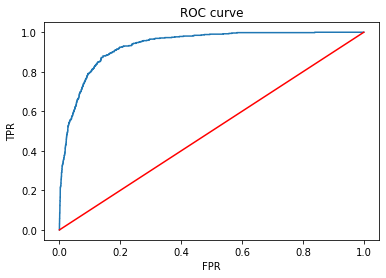

In [15]:
DrawRocCurves(df_loss, loss='MSE',ascending=True)

In [19]:
def get_auc(df_loss, pos_label= 1):

    Fpr, Tpr, thresholds = metrics.roc_curve(np.array(list(df_loss['NormAnorm'])),
                                            np.array(list(df_loss['MSE'])), pos_label= pos_label)
    print('\n*************************** \n AUC under ROC {} \n***************************n'.format(round(metrics.auc(Fpr, Tpr),2)))

In [21]:
get_auc(df_loss, pos_label= 0)


*************************** 
 AUC under ROC 0.93 
***************************n


In [22]:
vector_file = 'vectors_MNIST0.csv'
df_vectors  = pd.read_csv(main_dir+vector_file, header = None, sep = '\t')
df_vectors.head()

,0,1
0,7,[-0.05349956 -0.01303779 0.01019764 ... -0.02...
1,-0.02950257],NaN
2,5,[-0.04368855 -0.0053051 -0.0026413 ... -0.02...
3,-0.03617364],NaN
4,0,[-4.8565954e-02 -1.2293458e-05 -2.6894668e-02 ...
